# BagiBagi: Recommendation Systems for Consumer

Based on the given PRD and group discussion with BagiBagi Team, we all agreed to use Recommendation Systems using TensorFlow with a goals to map this following inputs:

1. Customer ID
2. Product Category
3. Quantity of past purchase
4. Customer Age
5. Age
6. Gender (optional)

To get the following outputs:



# Outline
- [ 0 - Import Dataset and Package ](#1)
- [ 1 - Data Description ](#1)
- [ 2 - Data Exploration ](#2)
- [ 3 - Data Pre-processing ](#3)
  - [ 3.1 ](#3.1)
  - [ 3.2 ](#3.2)
- [ 4 - Content-based filtering with a neural network ](#4)
  - [ 4.1 Split training data ](#3.1)
  - [ 4.2 Set the models](#3.2)
- [ 5 - Predictions](#5)
  - [ 5.1 - Predictions for a new user](#5.1)
  - [ 5.2 - Predictions for an existing user.](#5.2)
  - [ 5.3 - Finding Similar Items](#5.3)


##  0. Dataset & Packages
**For packages**,
1. Numpy
2. Pandas
3. TensorFlow
4. Sklearn
5. Tabulate
6. recommender-utils

**For dataset**,

We would like to use https://www.kaggle.com/datasets/mervemenekse/ecommerce-dataset due to it's completeness for product and user reviews

### Import Packages

In [71]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import tabulate
import seaborn as sns
import scipy.stats as scp
import plotly.express as px
import matplotlib.pyplot as plt
# from recsysNN_utils import *
# pd.set_option("display.precision", 1)

### Import Dataset

In [72]:
df = pd.read_csv('./E-commerce Dataset.csv')
df.head()

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card


## 1. Data Description

**Describing the data, including the data types and descriptive statistics**

In [73]:
df.describe()

,Aging,Customer_Id,Sales,Quantity,Discount,Profit,Shipping_Cost
count,51289.000000,51290.000000,51289.000000,51288.000000,51289.000000,51290.000000,51289.000000
mean,5.255035,58155.758764,152.340872,2.502983,0.303821,70.407226,7.041557
std,2.959948,26032.215826,66.495419,1.511859,0.131027,48.729488,4.871745
min,1.000000,10000.000000,33.000000,1.000000,0.100000,0.500000,0.100000
25%,3.000000,35831.250000,85.000000,1.000000,0.200000,24.900000,2.500000
50%,5.000000,61018.000000,133.000000,2.000000,0.300000,59.900000,6.000000
75%,8.000000,80736.250000,218.000000,4.000000,0.400000,118.400000,11.800000
max,10.500000,99999.000000,250.000000,5.000000,0.500000,167.500000,16.800000


In [74]:
df.dtypes

Order_Date              object
Time                    object
Aging                  float64
Customer_Id              int64
Gender                  object
Device_Type             object
Customer_Login_type     object
Product_Category        object
Product                 object
Sales                  float64
Quantity               float64
Discount               float64
Profit                 float64
Shipping_Cost          float64
Order_Priority          object
Payment_method          object
dtype: object

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51290 non-null  object 
 1   Time                 51290 non-null  object 
 2   Aging                51289 non-null  float64
 3   Customer_Id          51290 non-null  int64  
 4   Gender               51290 non-null  object 
 5   Device_Type          51290 non-null  object 
 6   Customer_Login_type  51290 non-null  object 
 7   Product_Category     51290 non-null  object 
 8   Product              51290 non-null  object 
 9   Sales                51289 non-null  float64
 10  Quantity             51288 non-null  float64
 11  Discount             51289 non-null  float64
 12  Profit               51290 non-null  float64
 13  Shipping_Cost        51289 non-null  float64
 14  Order_Priority       51288 non-null  object 
 15  Payment_method       51290 non-null 

In [76]:
num_rows, num_columns = df.shape

print('The data has ' + str(num_rows) + ' rows and ' + str(num_columns) + ' columns')

The data has 51290 rows and 16 columns


**Check null values and duplication**

In [77]:
# Check for null values in each column
null_counts = df.isnull().sum()

# Print the number of null values in each column
print("Null values in each column:")
print(null_counts)

Null values in each column:
Order_Date             0
Time                   0
Aging                  1
Customer_Id            0
Gender                 0
Device_Type            0
Customer_Login_type    0
Product_Category       0
Product                0
Sales                  1
Quantity               2
Discount               1
Profit                 0
Shipping_Cost          1
Order_Priority         2
Payment_method         0
dtype: int64


In [78]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Print the duplicate rows
print("Duplicate rows:")
print(duplicate_rows)

# Count the number of duplicate rows
duplicate_count = df.duplicated().sum()

# Print the number of duplicate rows
print("Number of duplicate rows:", duplicate_count)

Duplicate rows:
Empty DataFrame
Columns: [Order_Date, Time, Aging, Customer_Id, Gender, Device_Type, Customer_Login_type, Product_Category, Product, Sales, Quantity, Discount, Profit, Shipping_Cost, Order_Priority, Payment_method]
Index: []
Number of duplicate rows: 0


In [79]:
# Then, when there is no duplication, we need to drop the row with null values

df = df.dropna()

# Drop duplicate rows
df = df.drop_duplicates()

# Display the size of DataFrame
num_rows, num_columns = df.shape
print('The data has ' + str(num_rows) + ' rows and ' + str(num_columns) + ' columns')

The data has 51282 rows and 16 columns


**Data have four categories:**

1. Auto & Accessories
2. Fashion
3. Electronic
4. Home & Furniture

In [80]:
df['Product_Category'].unique()

array(['Auto & Accessories', 'Fashion', 'Electronic', 'Home & Furniture'],
      dtype=object)

## 2. Data Explorations

Aging	Customer_Id	Gender	Device_Type	Customer_Login_type	Product_Category	Product	Sales	Quantity	Discount	Profit	Shipping_Cost	Order_Priority	Payment_method

<Axes: xlabel='count', ylabel='Product_Category'>

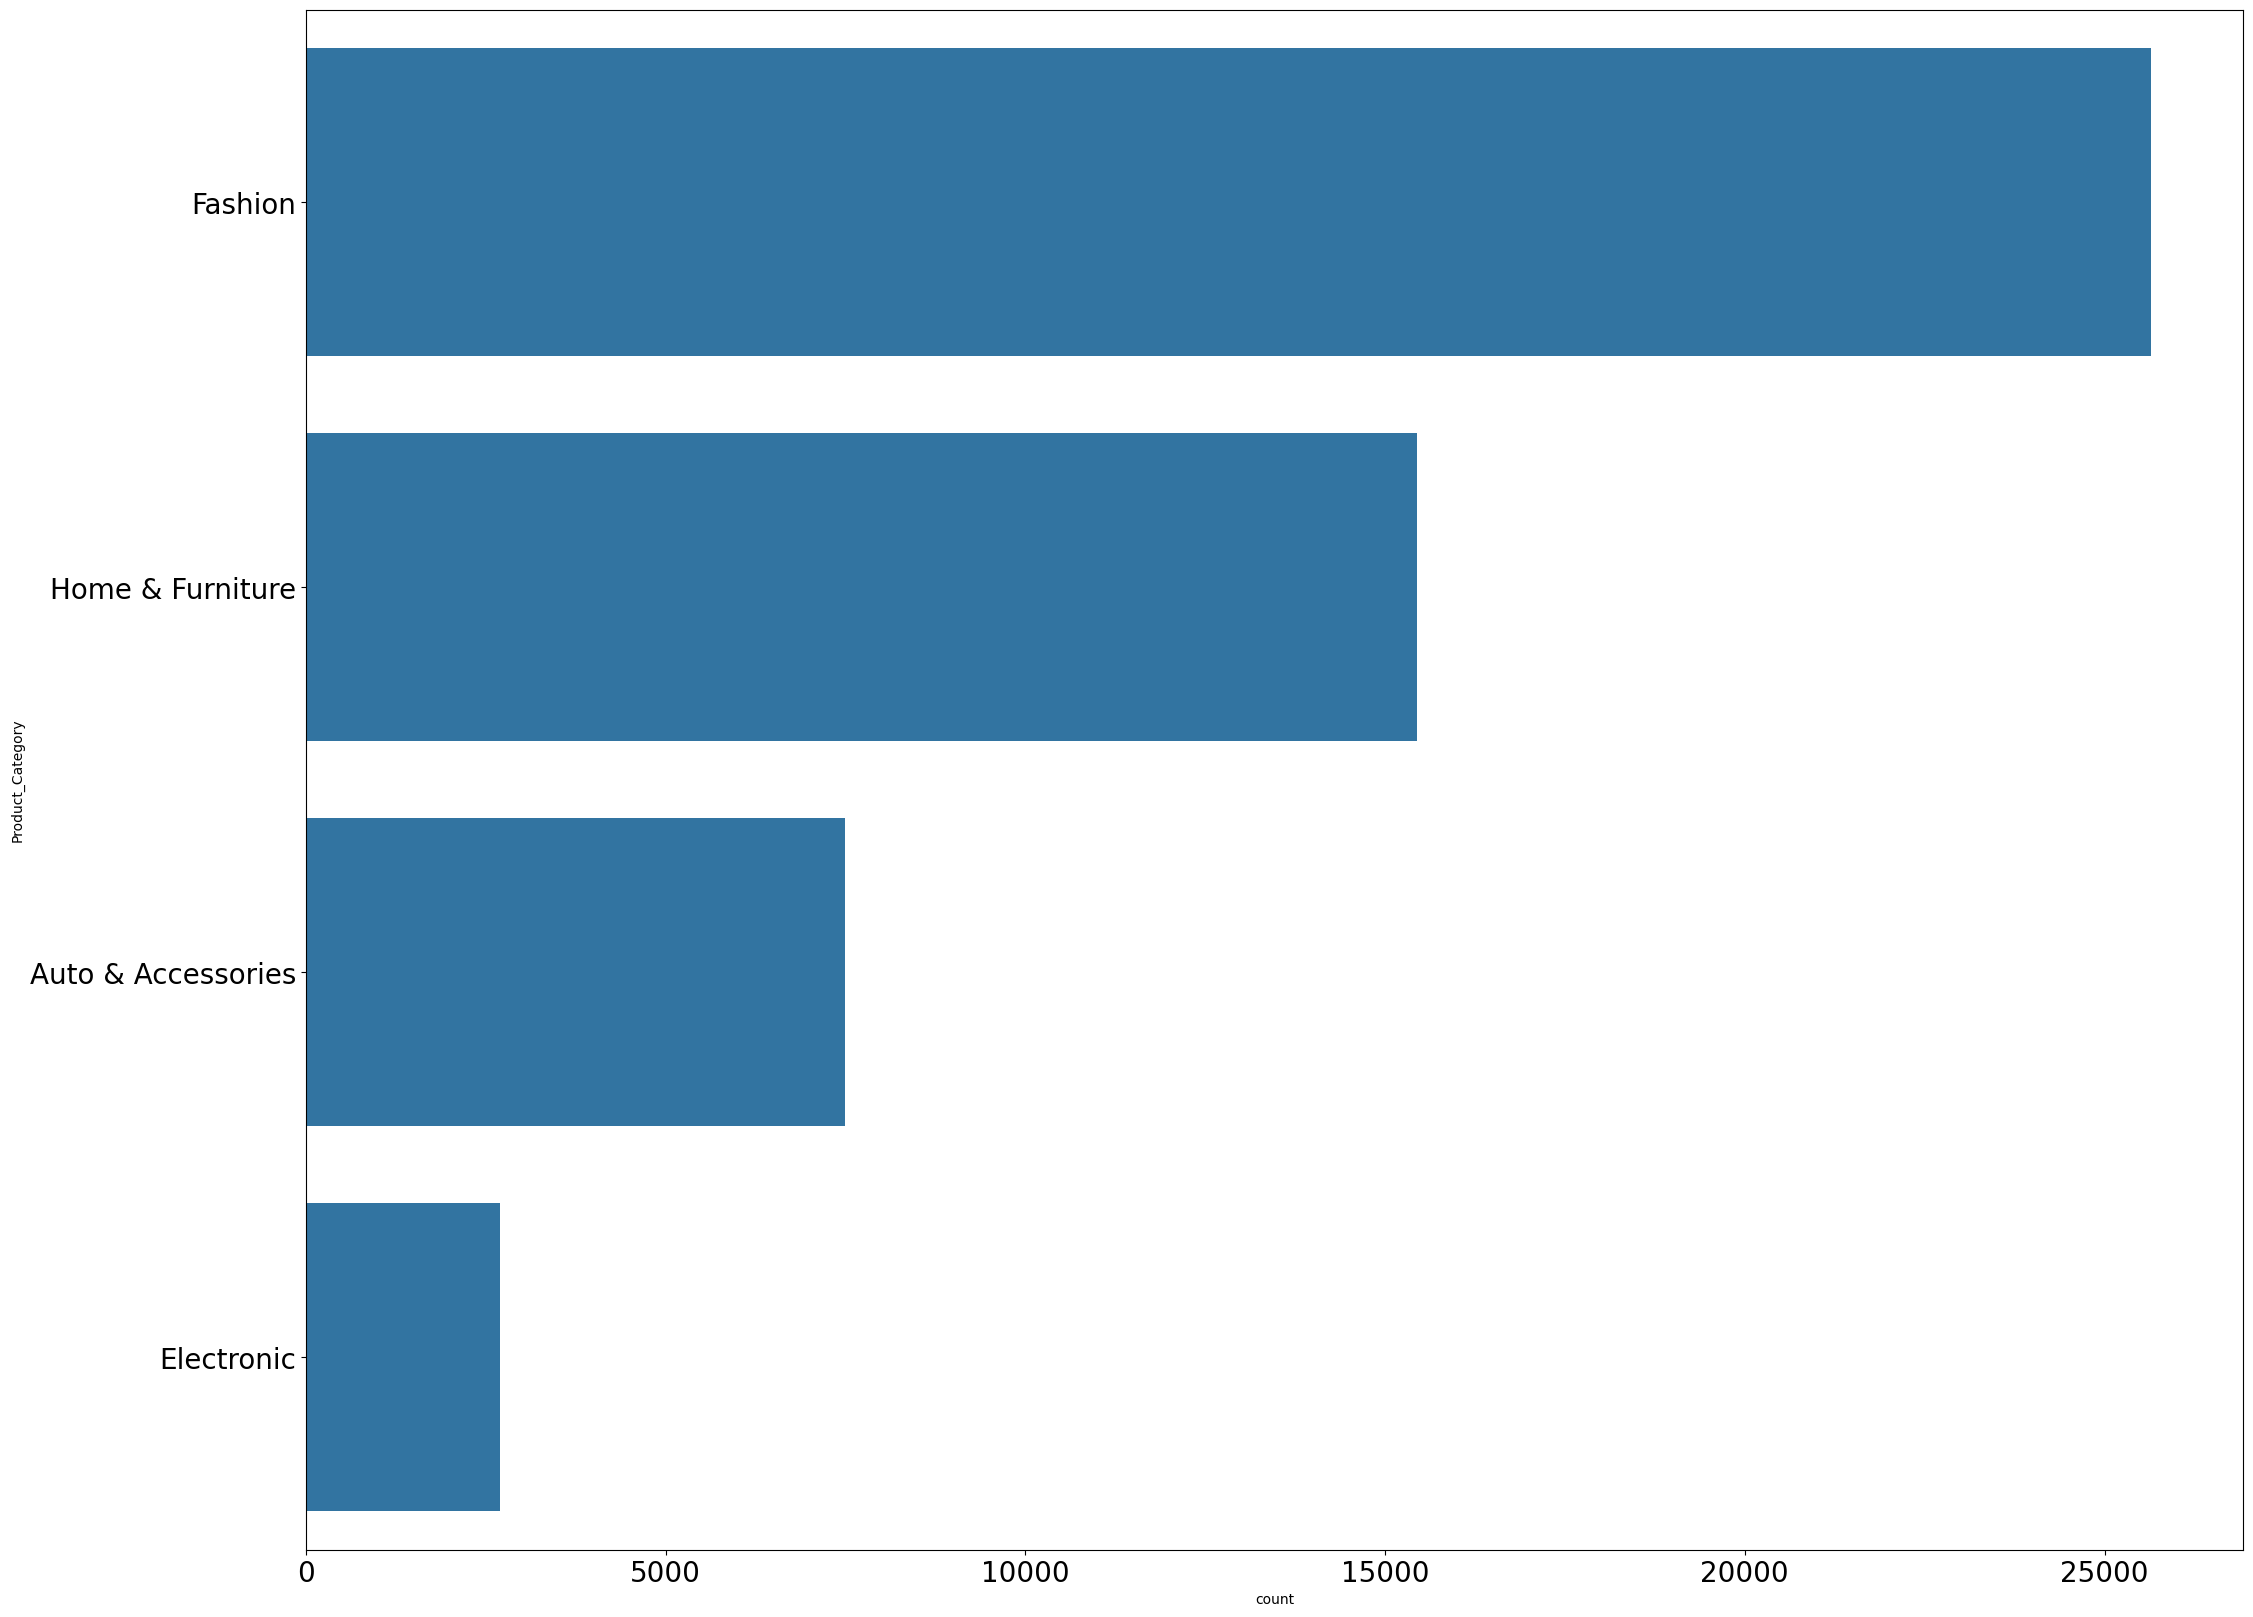

In [81]:
# Calculate the counts of each category and sort them in descending order
cat_counts = df['Product_Category'].value_counts().sort_values(ascending=False)

# Create a countplot with sorted order
plt.figure(figsize=(25, 20))
plt.yticks(size=20)
plt.xticks(size=20)
sns.countplot(y='Product_Category', data=df, order=cat_counts.index)

## 3. Data Pre-processing

### User dataset for `Xu` input

In [82]:
df[['Customer_Id', 'Product_Category', 'Quantity']]

,Customer_Id,Product_Category,Quantity
0,37077,Auto & Accessories,1.0
1,59173,Auto & Accessories,1.0
2,41066,Auto & Accessories,5.0
3,50741,Auto & Accessories,1.0
4,53639,Auto & Accessories,1.0
...,...,...,...
51285,78489,Home & Furniture,4.0
51286,91941,Home & Furniture,5.0
51287,63313,Home & Furniture,1.0
51288,86485,Home & Furniture,1.0


In [83]:
df_user = pd.pivot_table(df, index=['Customer_Id'], columns='Product_Category', values='Quantity', aggfunc='sum')

# Reset index to make Customer_Id a column again
df_user.reset_index(inplace=True)

# Fill NaN values with 0 (if a customer didn't purchase a certain category)
df_user.fillna(0, inplace=True)

# Combine the variables with the original DataFrame
# df_user = df_user.merge(df[['Customer_Id', 'Gender']], on='Customer_Id', how='left')
df_user = df_user.merge(df['Customer_Id'], on='Customer_Id', how='left')
df_user = df_user.groupby('Customer_Id')[['Auto & Accessories', 'Electronic', 'Fashion', 'Home & Furniture']].sum().reset_index()

# cols = df_user.columns.tolist()
# cols.insert(1, cols.pop(cols.index('Gender')))
# df_user = df_user[cols]

df_user

,Customer_Id,Auto & Accessories,Electronic,Fashion,Home & Furniture
0,10000,2.0,0.0,2.0,0.0
1,10002,0.0,2.0,0.0,0.0
2,10004,0.0,0.0,4.0,0.0
3,10006,0.0,6.0,0.0,0.0
4,10013,0.0,0.0,1.0,0.0
...,...,...,...,...,...
38985,99990,0.0,0.0,0.0,3.0
38986,99991,0.0,0.0,1.0,0.0
38987,99992,0.0,0.0,0.0,1.0
38988,99993,0.0,0.0,3.0,0.0


### Item/Product dataset for `Xm` input

In [84]:
# Pivot the DataFrame
df_products = pd.pivot_table(df, index=['Customer_Id'], columns='Product_Category', values='Quantity', aggfunc='sum')

# Reset index to make Customer_Id a column again
df_products.reset_index(inplace=True)

# Fill NaN values with 0
df_products.fillna(0, inplace=True)

# Merge df_products with the original DataFrame to include additional columns
df_products = df_products.merge(df[['Customer_Id', 'Aging']], on='Customer_Id', how='left')

# Calculate average quantity for each product category
avg_quantity = df.groupby(['Customer_Id'])['Quantity'].mean().reset_index()
avg_quantity.rename(columns={'Quantity': 'Avg_Quantity'}, inplace=True)

# Merge average quantity with df_products DataFrame
df_products = df_products.merge(avg_quantity, on='Customer_Id', how='left')

cols = df_products.columns.tolist()
cols.insert(1, cols.pop(cols.index('Aging')))
cols.insert(2, cols.pop(cols.index('Avg_Quantity')))
df_products = df_products[cols]

for value in df_user[['Auto & Accessories',	'Electronic',	'Fashion',	'Home & Furniture']][1:]:
    df_products[value] = df_products[value].apply(lambda x: 1 if x > 0 else 0)
df_user = df_user.groupby('Customer_Id')[['Auto & Accessories', 'Electronic', 'Fashion', 'Home & Furniture']].sum().reset_index()

# Display the transformed DataFrame
df_products


,Customer_Id,Aging,Avg_Quantity,Auto & Accessories,Electronic,Fashion,Home & Furniture
0,10000,1.0,1.0,1,0,1,0
1,10000,6.0,1.0,1,0,1,0
2,10002,10.0,2.0,0,1,0,0
3,10004,7.0,4.0,0,0,1,0
4,10006,7.0,1.5,0,1,0,0
...,...,...,...,...,...,...,...
51277,99990,5.0,3.0,0,0,0,1
51278,99991,3.0,1.0,0,0,1,0
51279,99992,5.0,1.0,0,0,0,1
51280,99993,2.0,3.0,0,0,1,0


### Dataset for `y_train`

In [85]:
y_train = df['Quantity']

y_train

0        1.0
1        1.0
2        5.0
3        1.0
4        1.0
        ... 
51285    4.0
51286    5.0
51287    1.0
51288    1.0
51289    5.0
Name: Quantity, Length: 51282, dtype: float64

### Drop the `Customer_Id` and define the y_train

In [86]:
user_train_unscaled = df_user.drop('Customer_Id', axis='columns')
product_train_unscaled = df_products.drop('Customer_Id', axis='columns')
y_train_unscaled    = np.array(df['Quantity']).reshape(-1, 1)

### Label Encoding

#### Encoding for `df_user`

In [87]:
# Initialize LabelEncoder
le_gender = LabelEncoder()

# Encode 'Gender' columns
# user_train_unscaled['Gender'] = le_gender.fit_transform(user_train_unscaled['Gender'])

#### Encoding for `df_products`

In [88]:
# Initialize LabelEncoder
le_product = LabelEncoder()
le_product_cat = LabelEncoder()

# Encode 'Product' and 'Product_Category' columns
# df_products['Product'] = le_product.fit_transform(df_products['Product'])
# df_products['Product_Category'] = le_product_cat.fit_transform(df_products['Product_Category'])

# product_train_unscaled['Product'] = le_product.fit_transform(product_train_unscaled['Product'])
# product_train_unscaled['Product_Category'] = le_product_cat.fit_transform(product_train_unscaled['Product_Category'])

product_train_unscaled

,Aging,Avg_Quantity,Auto & Accessories,Electronic,Fashion,Home & Furniture
0,1.0,1.0,1,0,1,0
1,6.0,1.0,1,0,1,0
2,10.0,2.0,0,1,0,0
3,7.0,4.0,0,0,1,0
4,7.0,1.5,0,1,0,0
...,...,...,...,...,...,...
51277,5.0,3.0,0,0,0,1
51278,3.0,1.0,0,0,1,0
51279,5.0,1.0,0,0,0,1
51280,2.0,3.0,0,0,1,0


### Normalization/Standardization

In [89]:
# scale training data
scalerUser = StandardScaler()
scalerUser.fit(user_train_unscaled)
user_train = scalerUser.transform(user_train_unscaled)

scalerProducts = StandardScaler()
scalerProducts.fit(product_train_unscaled)
products_train = scalerProducts.transform(product_train_unscaled)

scalerTarget = MinMaxScaler((-1, 1))
scalerTarget.fit(np.array(y_train).reshape(-1,1))
y_train = scalerTarget.transform(np.array(y_train).reshape(-1,1))

print(np.allclose(user_train_unscaled, scalerUser.inverse_transform(user_train)))
print(np.allclose(product_train_unscaled, scalerProducts.inverse_transform(products_train)))

True
True


## Content-based filtering with a neural network

### Splitting the Data

In [90]:
user_train, user_test = train_test_split(user_train, train_size=0.80, shuffle=True, random_state=1)
products_train, products_test = train_test_split(products_train, train_size=0.80, shuffle=True, random_state=1)
y_train, y_test       = train_test_split(y_train,    train_size=0.80, shuffle=True, random_state=1)

print(f"User training data shape: {user_train.shape}")
print(f"User test data shape: {user_test.shape}")

print(f"Products training data shape: {products_train.shape}")
print(f"Products test data shape: {products_test.shape}")

User training data shape: (31192, 4)
User test data shape: (7798, 4)
Products training data shape: (41025, 6)
Products test data shape: (10257, 6)


In [91]:
y_train

array([[ 0. ],
       [-0.5],
       [ 0.5],
       ...,
       [-1. ],
       [-1. ],
       [-0.5]])

In [92]:
num_user_features = user_train.shape[1]
num_product_features = products_train.shape[1]

### Set the models

In [ ]:
num_outputs = 32
tf.random.set_seed(1)
user_NN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_outputs, activation=None)
])

products_NN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_outputs, activation=None)
])

# Define input layers for user and product data
input_user = tf.keras.layers.Input(shape=(num_user_features,))
input_item = tf.keras.layers.Input(shape=(num_product_features,))

# Pass user and product inputs through their respective neural networks
vu = user_NN(input_user)
vm = products_NN(input_item)

# Normalize the output vectors
vu_normalized = tf.linalg.l2_normalize(vu, axis=1)
vm_normalized = tf.linalg.l2_normalize(vm, axis=1)

# Compute the dot product of the normalized vectors
output = tf.keras.layers.Dot(axes=1)([vu_normalized, vm_normalized])

# Create the model with inputs and output
model = tf.keras.Model([input_user, input_item], output)

# Print model summary
model.summary()

In [ ]:
# Set random seed for reproducibility
tf.random.set_seed(1)

# Compile the model
cost_fn = tf.keras.losses.MeanSquaredError()
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss=cost_fn, metrics=['accuracy'])

# Train the model with validation data
history = model.fit(
    x=[np.asarray(user_train), np.asarray(products_train)],
    y=np.asarray(y_train),
    epochs=30,
    validation_data=([np.asarray(user_test), np.asarray(products_test)], np.asarray(y_test))
)

# Print the training and validation loss and accuracy
print("Training Loss:", history.history['loss'])
print("Validation Loss:", history.history['val_loss'])
print("Training Accuracy:", history.history['accuracy'])
print("Validation Accuracy:", history.history['val_accuracy'])


## Predictions

### Predictions for a new user

In [ ]:
new_user_id = 10
new_auto_accessories = 0.0
new_electronic = 5.0
new_fashion = 0
new_home_furniture = 5.0

user_vecs = np.array([[new_auto_accessories, new_electronic, new_fashion, new_home_furniture]])
print(user_vecs)

In [ ]:
# scale our user and item vectors
suser_vecs = scalerUser.transform(user_vecs)
sproducts_vecs = scalerProducts.transform(product_train_unscaled)

suser_vecs = np.repeat(suser_vecs, len(sproducts_vecs), axis=0)

# make a prediction
y_p = model.predict([np.asarray(suser_vecs), np.asarray(sproducts_vecs)])

# unscale y prediction
y_pu = scalerTarget.inverse_transform(y_p)

# sort the results, highest prediction first
sorted_index = np.argsort(-y_pu,axis=0).reshape(-1).tolist()  #negate to get largest rating first
sorted_ypu   = y_pu[sorted_index]
sorted_items = sproducts_vecs[sorted_index]  #using unscaled vectors for display

# Get the original items corresponding to the sorted indices
sorted_original_items = df[['Product', 'Product_Category', 'Aging']].iloc[sorted_index]

# Print or use the sorted original items
sorted_original_items.head(10)

In [ ]:
existing_id = 37077
# Auto & Accessories	Electronic	Fashion	Home & Furniture

user_data = df_user[df_user['Customer_Id'] == existing_id]
# user_vecs = np.array(df_user[['Auto & Accessories',	'Electronic'	,'Fashion'	,'Home & Furniture']])
kolom = ['Auto & Accessories', 'Electronic', 'Fashion', 'Home & Furniture']
user_vecs = user_data[kolom]
print(user_vecs)
suser_vecs = scalerUser.transform(user_vecs)
sproducts_vecs = scalerProducts.transform(product_train_unscaled)

suser_vecs = np.repeat(suser_vecs, len(sproducts_vecs), axis=0)

# make a prediction
y_p = model.predict([np.asarray(suser_vecs), np.asarray(sproducts_vecs)])

# unscale y prediction
y_pu = scalerTarget.inverse_transform(y_p)

# sort the results, highest prediction first
sorted_index = np.argsort(-y_pu,axis=0).reshape(-1).tolist()  #negate to get largest rating first
sorted_ypu   = y_pu[sorted_index]
sorted_items = sproducts_vecs[sorted_index]  #using unscaled vectors for display

# Get the original items corresponding to the sorted indices
sorted_original_items = df[['Product', 'Product_Category', 'Aging']].iloc[sorted_index]

# Print or use the sorted original items
sorted_original_items.head(10)